In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/creditcard.csv')

Features V1, V2, … V28 are the principal components obtained with PCA.
The only features which have not been transformed with PCA are 'Time' and 'Amount'. 
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Visulize target "Class"

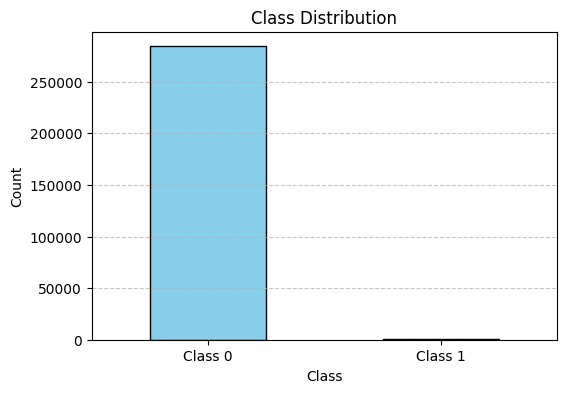

In [54]:
# Count occurrences of each class
class_counts = df["Class"].value_counts()

# Plot
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ['Class 0', 'Class 1'], rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


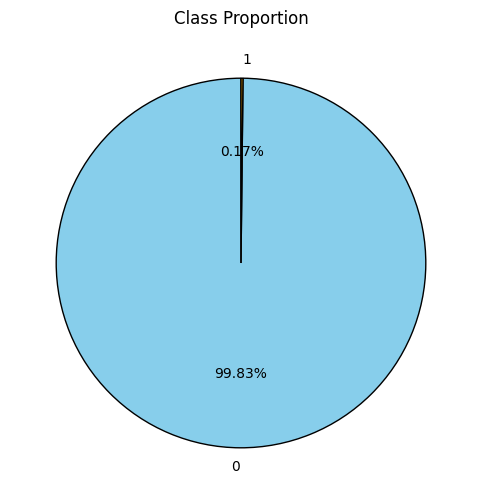

In [58]:
plt.figure(figsize=(6, 6))
class_counts.plot(kind='pie', autopct='%1.2f%%', startangle=90, colors=['skyblue', 'orange'], wedgeprops=dict(edgecolor='black'))
plt.title("Class Proportion")
plt.ylabel("")  # Remove y-axis label
plt.show()

# Visualize features

## Boxplot

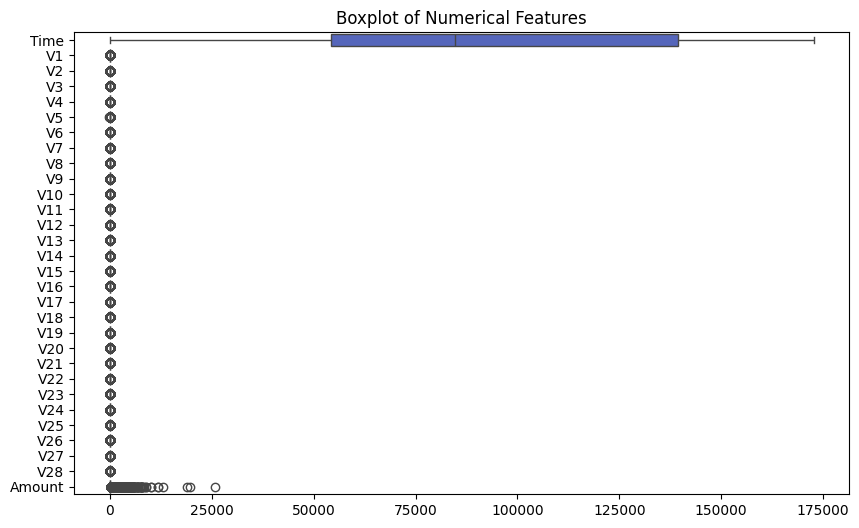

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(['Class'], axis=1), orient="h", palette="coolwarm")
plt.title("Boxplot of Numerical Features")
plt.show()

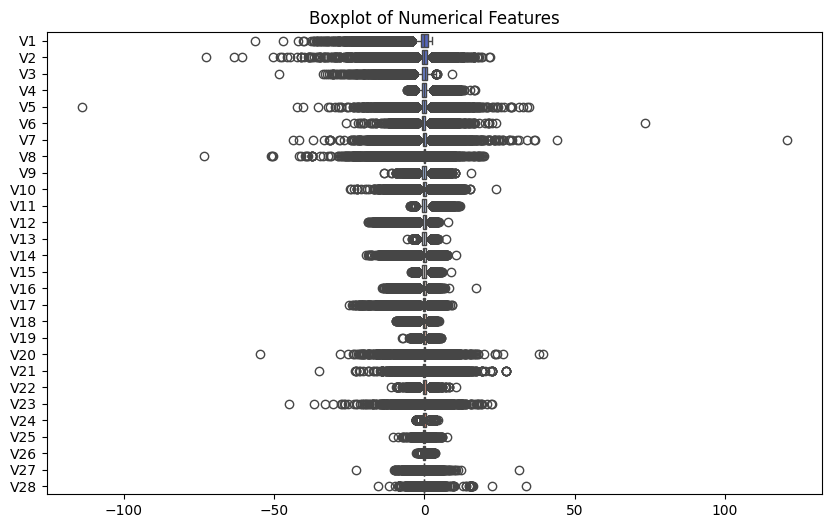

In [ ]:
# Remove Time and Amount the see the others better
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(['Time', 'Amount', 'Class'], axis=1), orient="h", palette="coolwarm")
plt.title("Boxplot of Numerical Features")
plt.show()

## Histogram

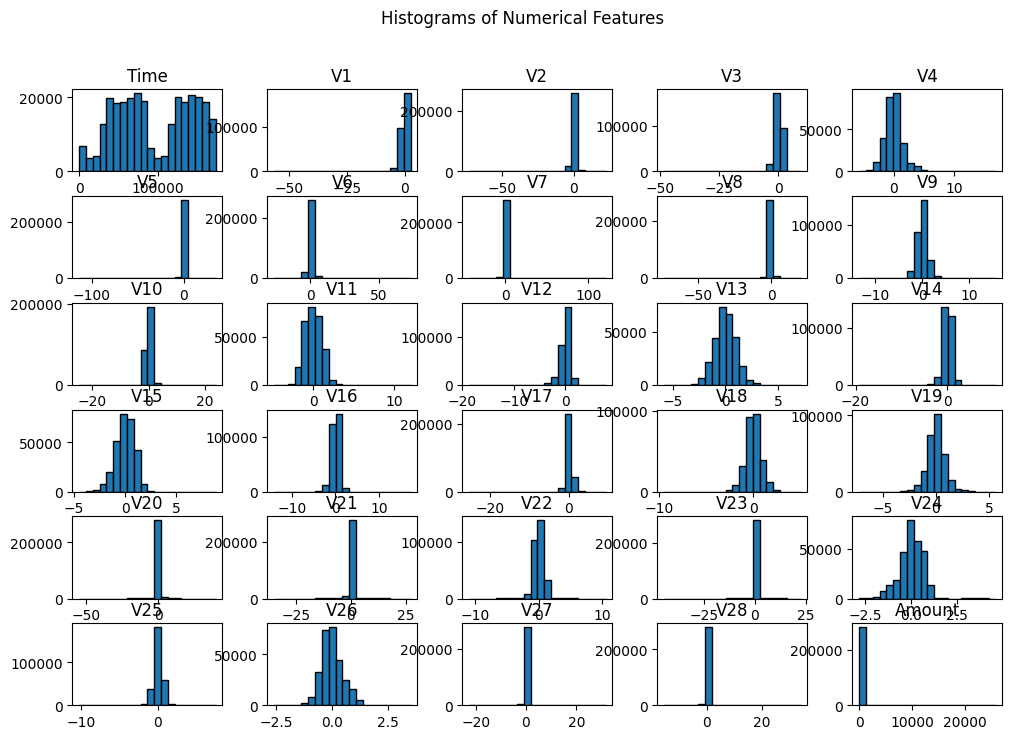

In [66]:
df.drop(["Class"], axis=1).hist(bins=20, figsize=(12, 8), grid=False, edgecolor="black")
plt.suptitle("Histograms of Numerical Features")
plt.show()

## Barchart for mean and std

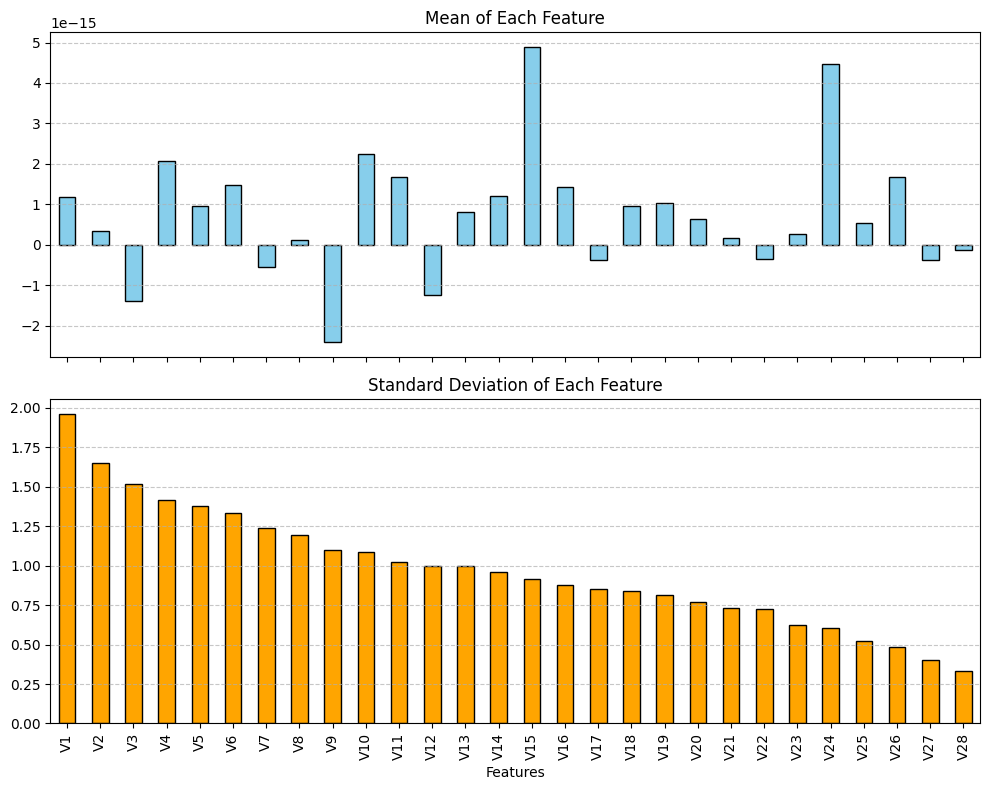

In [65]:
desc = df.drop(["Time", "Amount", "Class"], axis=1).describe().T

fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
desc['mean'].plot(kind="bar", ax=ax[0], color="skyblue", edgecolor="black")
ax[0].set_title("Mean of Each Feature")
ax[0].grid(axis="y", linestyle="--", alpha=0.7)

desc['std'].plot(kind="bar", ax=ax[1], color="orange", edgecolor="black")
ax[1].set_title("Standard Deviation of Each Feature")
ax[1].set_xlabel("Features")
ax[1].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

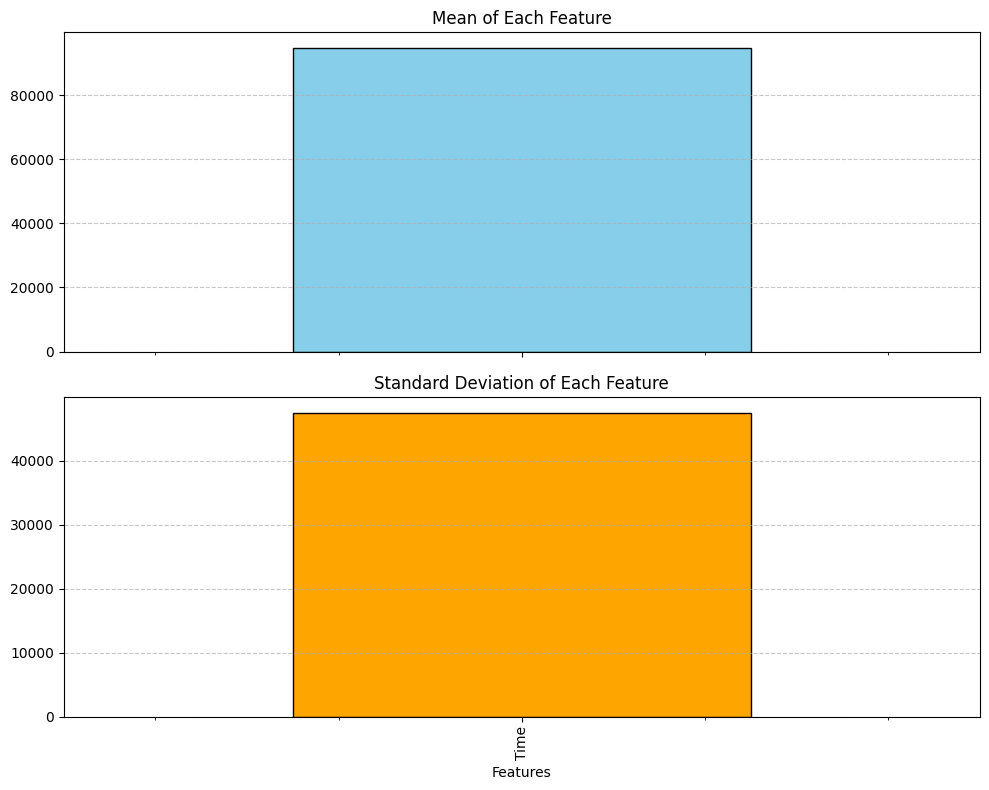

In [ ]:
desc = df[["Time"]].describe().T

fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
desc['mean'].plot(kind="bar", ax=ax[0], color="skyblue", edgecolor="black")
ax[0].set_title("Mean of Time")
ax[0].grid(axis="y", linestyle="--", alpha=0.7)

desc['std'].plot(kind="bar", ax=ax[1], color="orange", edgecolor="black")
ax[1].set_title("Standard Deviation of Time")
ax[1].set_xlabel("Features")
ax[1].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

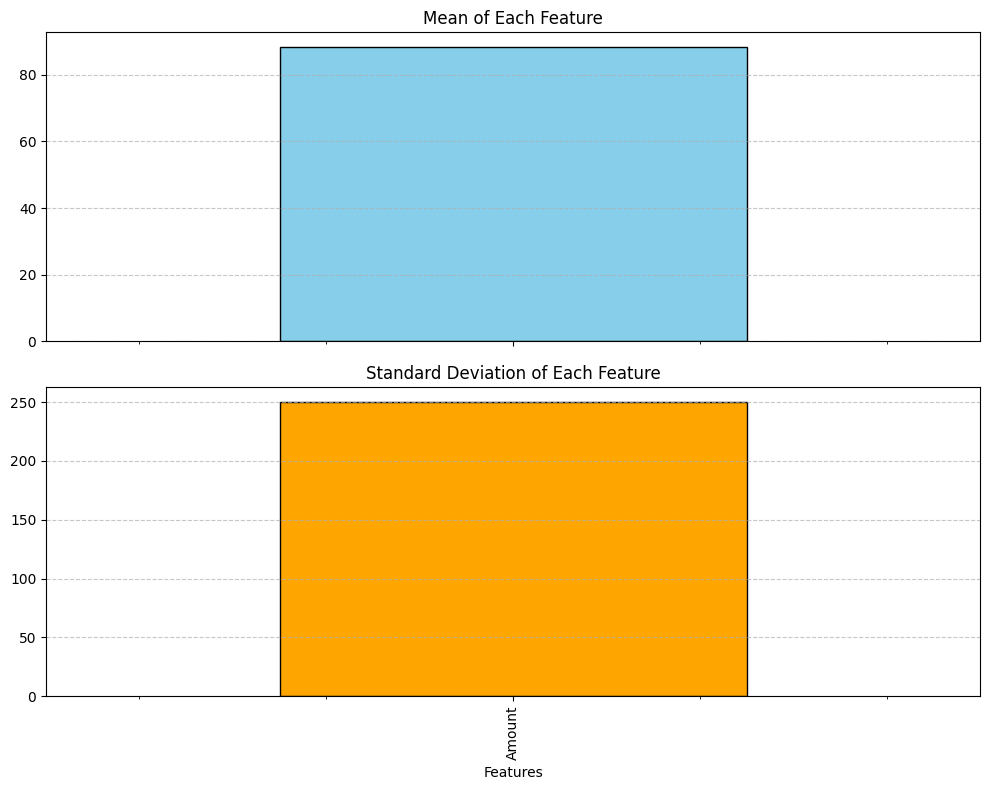

In [ ]:
desc = df[["Amount"]].describe().T

fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
desc['mean'].plot(kind="bar", ax=ax[0], color="skyblue", edgecolor="black")
ax[0].set_title("Mean of Amount")
ax[0].grid(axis="y", linestyle="--", alpha=0.7)

desc['std'].plot(kind="bar", ax=ax[1], color="orange", edgecolor="black")
ax[1].set_title("Standard Deviation of Amount")
ax[1].set_xlabel("Features")
ax[1].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

[Text(0.5, 0, 'Time'),
 Text(2.5, 0, 'V2'),
 Text(4.5, 0, 'V4'),
 Text(6.5, 0, 'V6'),
 Text(8.5, 0, 'V8'),
 Text(10.5, 0, 'V10'),
 Text(12.5, 0, 'V12'),
 Text(14.5, 0, 'V14'),
 Text(16.5, 0, 'V16'),
 Text(18.5, 0, 'V18'),
 Text(20.5, 0, 'V20'),
 Text(22.5, 0, 'V22'),
 Text(24.5, 0, 'V24'),
 Text(26.5, 0, 'V26'),
 Text(28.5, 0, 'V28'),
 Text(30.5, 0, 'Class')]

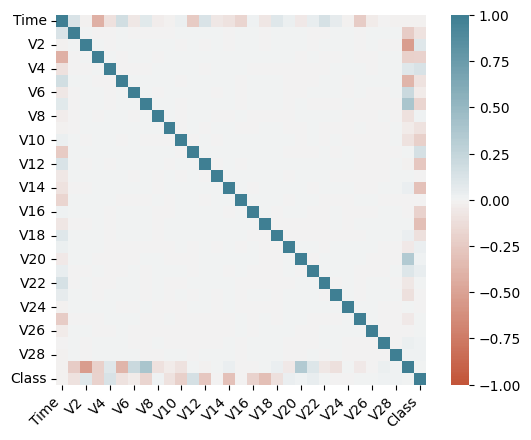

In [11]:
import seaborn as sns

corr = df.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

## Correlation matrix

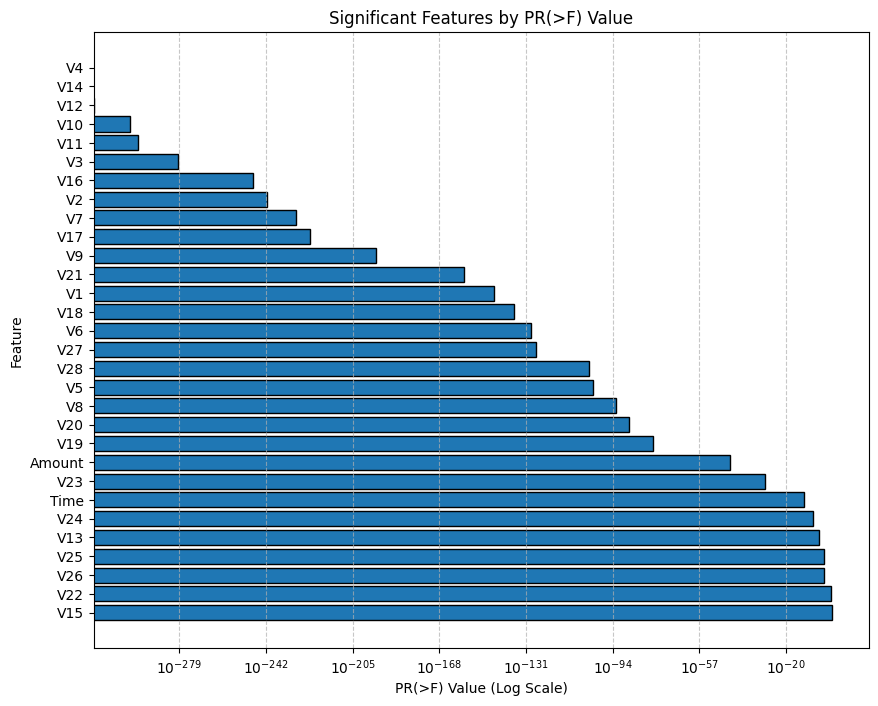

In [ ]:
import matplotlib.pyplot as plt
from src.preprocess.feature_selection import test_significant

target = "Class"
features = df.columns.tolist()
features = [f for f in features if f != target]

p_values = pd.DataFrame()  
for p in features:
    # Test significance of each feature and store the result
    p_value = test_significant(df, p, target)
    p_values = pd.concat([p_values, p_value]).reset_index(drop=True)

p_values = p_values.sort_values("PR(>F)").reset_index(drop=True)

plt.figure(figsize=(10, 8))
plt.barh(p_values['feature'], p_values['PR(>F)'], edgecolor="black")
plt.xlabel("PR(>F) Value (Log Scale)")
plt.ylabel("Feature")
plt.title("Significant Features by PR(>F) Value")
plt.xscale("log")
plt.gca().invert_yaxis()  # Lowest value at the top
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

## Compare significant features by target Class 

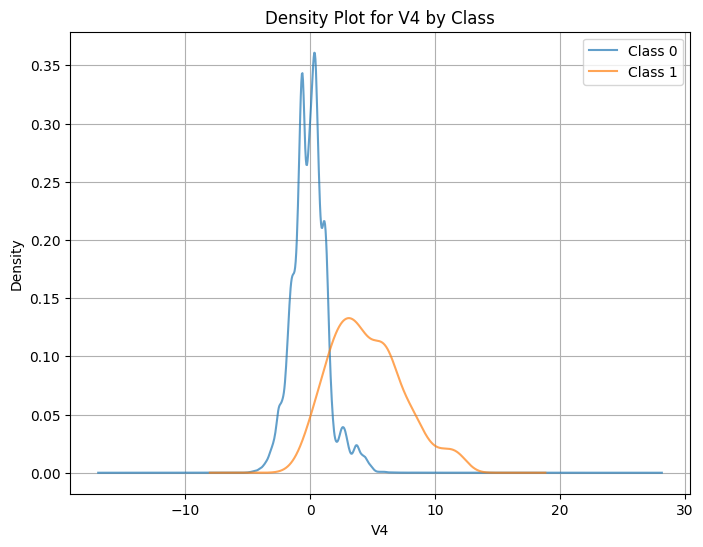

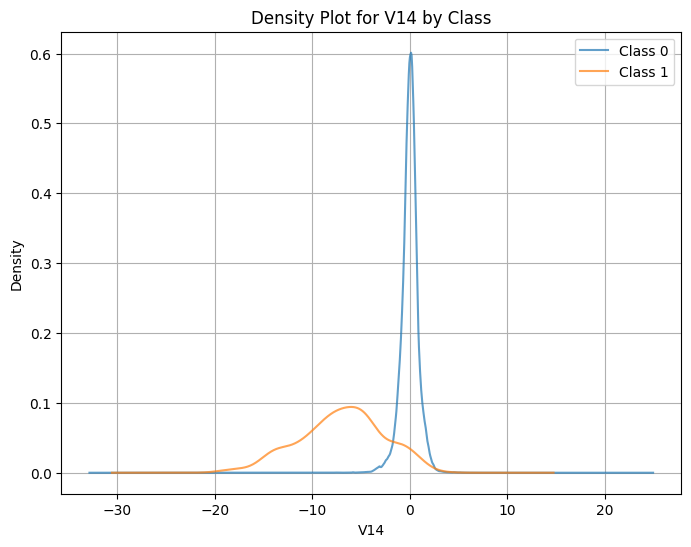

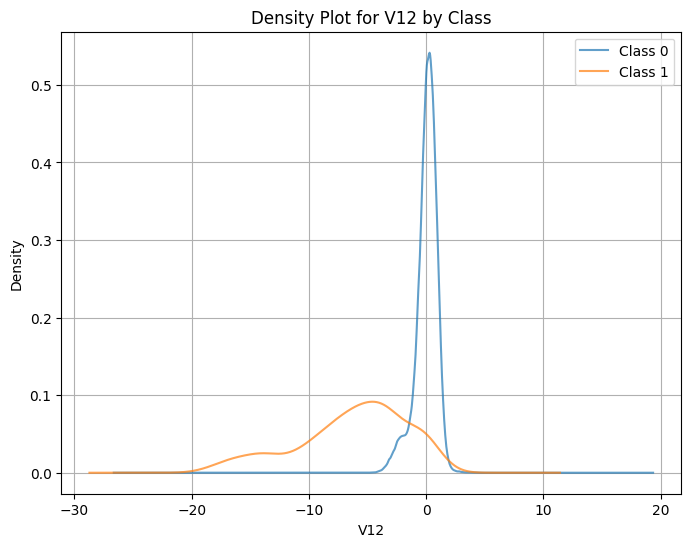

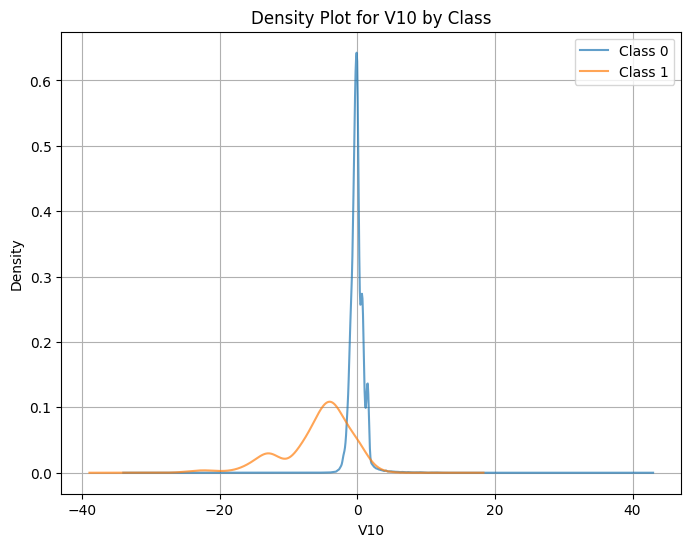

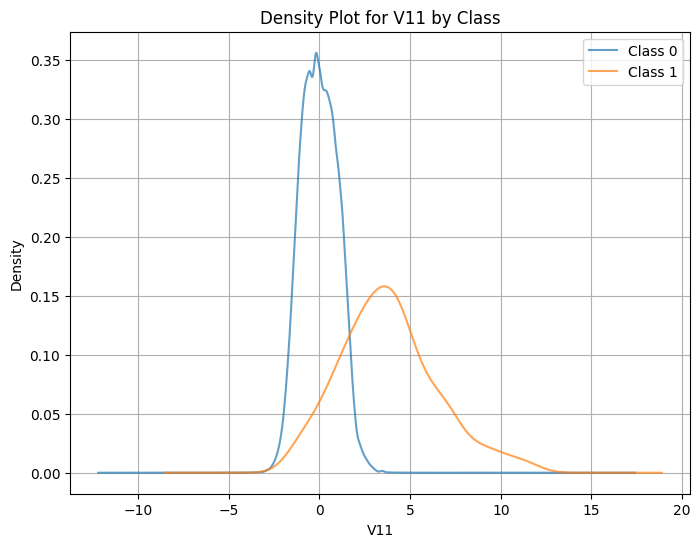

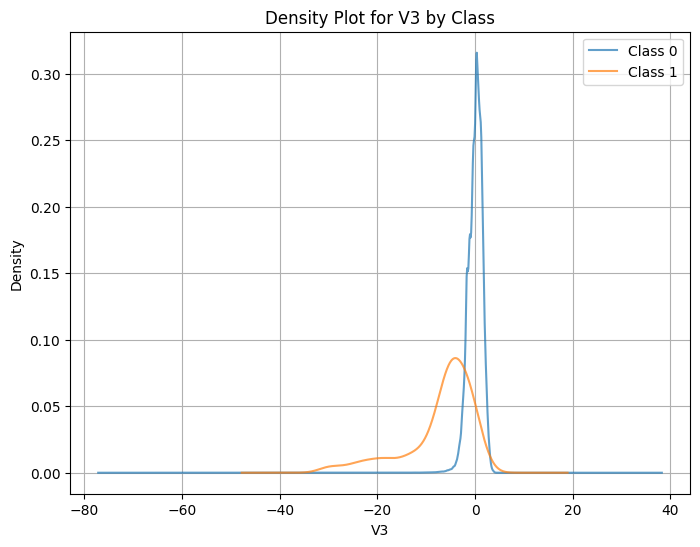

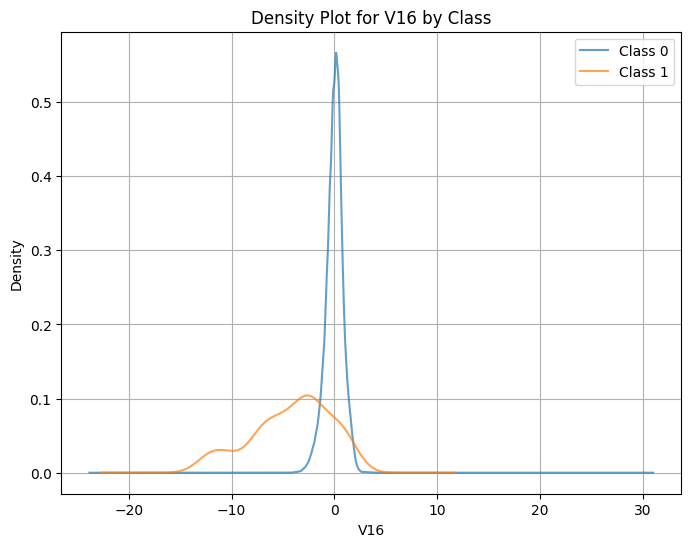

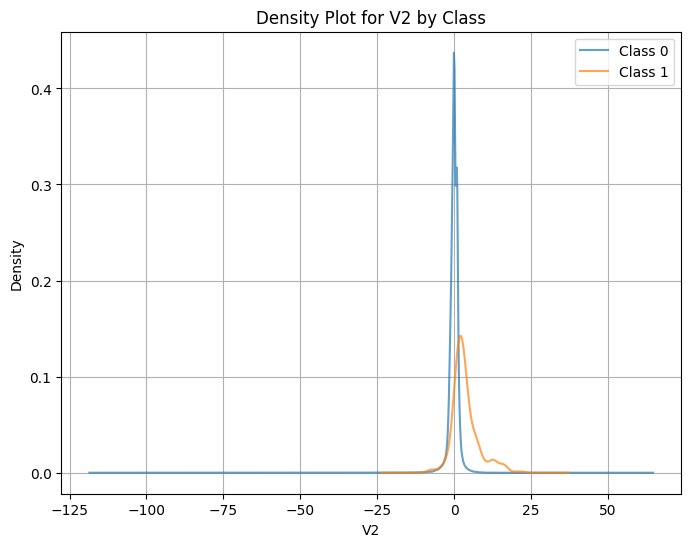

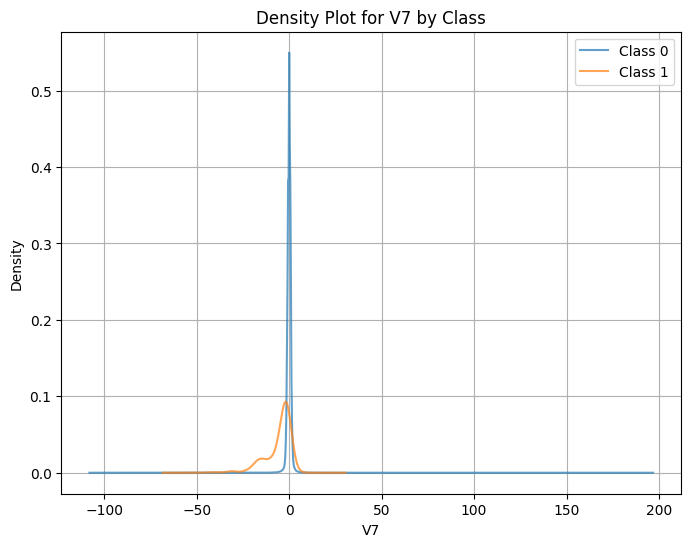

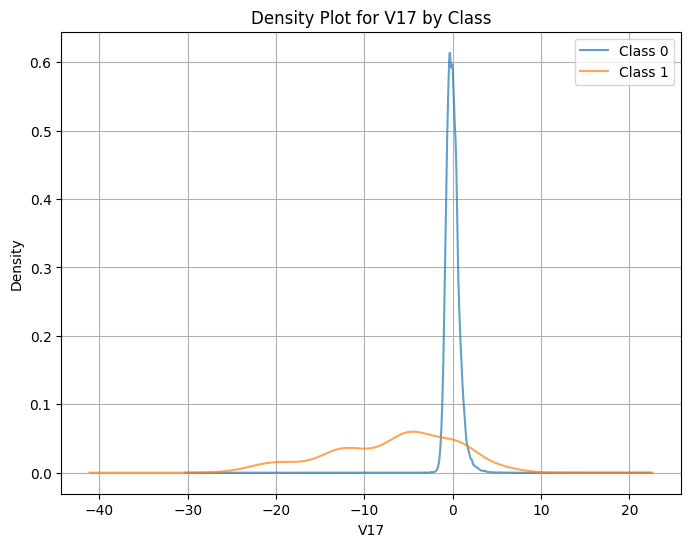

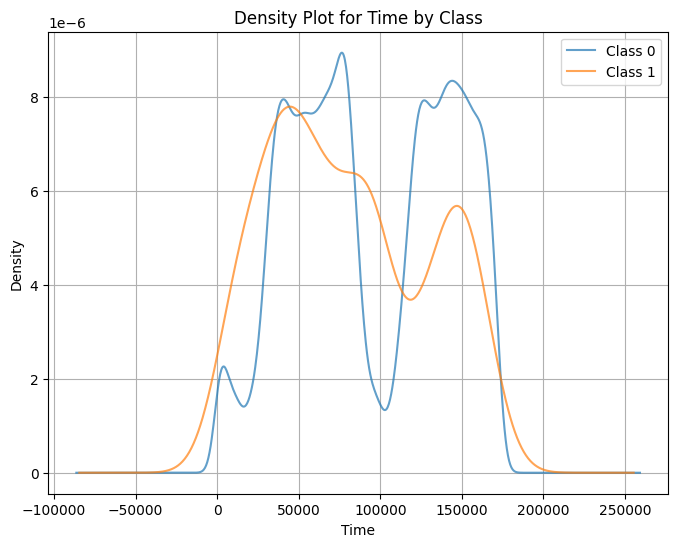

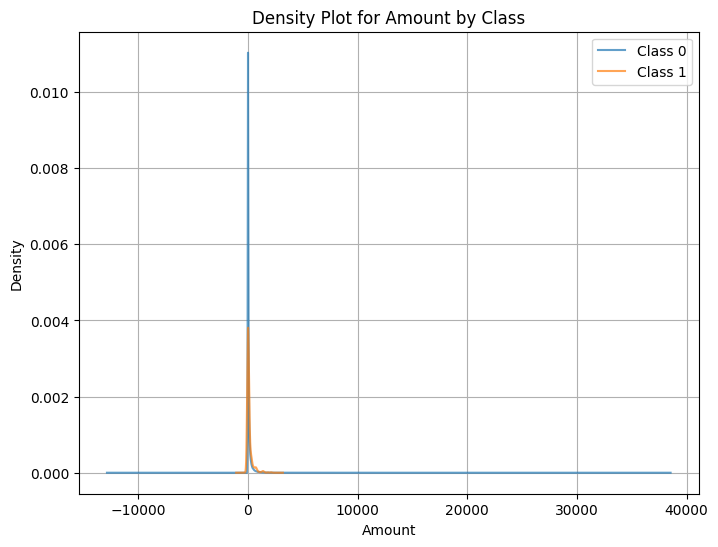

In [ ]:
import matplotlib.pyplot as plt


#plot_feature = p_values[p_values["PR(>F)"] < 0.05]["feature"]
plot_feature = list(dict.fromkeys(p_values[p_values["PR(>F)"] < 0.05].head(10)['feature'].tolist() + ['Time', 'Amount']))

for feature in plot_feature:
    plt.figure(figsize=(8, 6))
    for target_class in df["Class"].unique():
        subset = df[df["Class"] == target_class]
        subset[feature].plot(kind="kde", label=f"Class {target_class}", alpha=0.7)
    plt.title(f"Density Plot for {feature} by Class")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

In [76]:
df.sample(n=100)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
249895,154626.0,1.914107,-0.037791,-1.806719,1.229328,0.573958,-0.592519,0.560000,-0.225942,0.055123,...,0.099595,0.336543,-0.101622,-0.474480,0.441826,-0.485645,-0.032670,-0.068596,60.00,0
147270,88312.0,1.916034,0.575224,-0.627471,3.813786,0.425384,-0.145867,0.230309,-0.189646,-0.982804,...,0.301616,1.030154,-0.022258,-0.043863,0.241622,0.247790,-0.025047,-0.050681,10.65,0
279485,168896.0,0.052541,0.811642,0.214653,-0.612626,0.409372,-1.051099,0.974941,-0.161639,0.064642,...,-0.276707,-0.652636,0.064334,-0.135655,-0.491106,0.149577,0.241951,0.094607,5.55,0
96500,65798.0,-0.872416,1.194620,1.687815,-0.085113,-0.150145,-0.751705,0.783766,-0.126344,0.191678,...,-0.285975,-0.453896,0.068066,0.562314,-0.281317,0.050931,0.324203,0.031402,8.92,0
212393,138837.0,1.878470,0.245783,-0.180231,3.437445,0.516674,1.592014,-0.638221,0.369625,-0.638921,...,0.181526,0.622393,0.091724,-0.202570,-0.109002,0.030728,0.016298,-0.040467,9.62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187689,127647.0,-0.107461,0.395377,0.927038,-0.292872,0.126934,-0.139281,0.286603,-0.291387,1.120192,...,0.322753,1.291711,-0.086412,-0.377264,-0.677138,-0.243821,-0.360087,-0.107118,2.00,0
25901,33815.0,-1.715953,1.347583,0.879732,-1.793249,-0.003540,-0.372501,0.454052,0.223154,0.809712,...,-0.297015,-0.336500,-0.110027,-0.501702,-0.099279,0.723710,0.238274,-0.111523,7.68,0
66151,51911.0,-0.862674,0.654272,1.829386,-0.994818,0.473093,0.918238,0.863237,-0.378552,0.482527,...,-0.097708,-0.057937,-0.438941,-1.286451,0.264421,0.323548,-0.883152,-0.452577,69.90,0
11767,20134.0,-3.837373,2.200152,-0.467955,-1.578277,-1.936930,-0.692456,-1.453040,1.960289,2.060045,...,0.050140,-0.008942,0.163244,-0.129228,0.120005,1.152323,-0.988274,0.004736,29.95,0


In [78]:
from datetime import datetime

datetime.now().strftime('%Y%m%d_%H%M%S')

'20241126_102312'